# U.S. Medical Insurance Costs

## Importing Data

Here I import the csv file and organize the data in lists. Note that when importing the data, all columns are read as `str`. For this reason I converted `age and children` to `int` and `bmi and charges` to `float` after looking at their values in the dataset. 

In [1]:
import csv 
import statistics as st 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

insurance = pd.read_csv('insurance.csv')

age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

with open('insurance.csv', newline = '') as user_csv:
    user_reader = csv.DictReader(user_csv)
    for row in user_reader:
        age.append(int(row['age']))
        sex.append(row['sex'])
        bmi.append(float(row['bmi']))
        children.append(int(row['children']))
        smoker.append(row['smoker'])
        region.append(row['region'])
        charges.append(float(row['charges']))



## Demographics

In [2]:
age_avg = st.mean(age)
age_median = st.median(age)

print(age_avg)
print(age_median)

39.20702541106129
39.0


### BMI ranges and standard weight status categories according to CDC
```For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages. Athletes are excluded from these standards they may have high lean body mass (muscle and bone)```

$$ BMI = \frac{weight(kg)}{height(m)^2} $$
$$ BMI = \frac{weight(lb)}{height(in)^2} * 703 $$

| BMI            | Weight Status            |
| -------------- | ------------------------ |
| Below 18.5     | Underweight              |
| 18.5 – 24.9    | Normal or Healthy Weight |
| 25.0 – 29.9    | Overweight               |
| 30.0 and Above | Obese                    |

In [3]:
# percentage of males

def sex_percentage(sex):
    count_male = 0
    count_female = 0
    total = len(sex)
    
    for i in sex:
        if i == 'male':
            count_male += 1
        elif i == 'female':
            count_female += 1

    percentage_male = '{:.2f}'.format((count_male / total) * 100)
    percentage_female = '{:.2f}'.format((count_female / total) * 100)
    return 'The percentage of males in this study is: ' + "\033[1m" + str(percentage_male) + '% ' "\033[0m"  + 'and the percentage of women in this study is: ' + "\033[1m" + str(percentage_female)  + '%' + "\033[0m"

#bolded_string = "\033[1m" + a_string + "\033[0m"


print(sex_percentage(sex))

The percentage of males in this study is: 50.52% and the percentage of women in this study is: 49.48%


In [4]:
# % of smokers
def smoker_percentage(smoker):
    count_smoker = 0
    count_non_smoker = 0
    total = len(smoker)
    
    for i in smoker:
        if i == 'yes':
            count_smoker += 1
        elif i == 'no':
            count_non_smoker += 1

    percentage_smoker = '{:.2f}'.format((count_smoker / total) * 100)
    percentage_non_smoker = '{:.2f}'.format((count_non_smoker / total) * 100)
    return 'The percentage of smokers in this study is: ' + "\033[1m" + str(percentage_smoker) + '% ' "\033[0m"  + 'and the percentage of non-smokers in this study is: ' + "\033[1m" + str(percentage_non_smoker)  + '%' + "\033[0m"

#bolded_string = "\033[1m" + a_string + "\033[0m"


print(smoker_percentage(smoker))

The percentage of smokers in this study is: 20.48% and the percentage of non-smokers in this study is: 79.52%


# Using Pandas

## Define Plot Functions

In [5]:
def plot_1x(chart_labels, data_func, legend1, chart_title, symbol = '%'):

    #colors
    yellow = '#FFB400'
    orange = '#F6511D'
    light_blue = '#00A6ED'
    light_green = '#8A8A88'
    dark_blue = '#0D2C54'
    red = '#dd1c1a'
    grey_blue = '#3c6e71'

    # Data
    labels = chart_labels
    data = data_func


    # Color ordering of the bars
    series_1_colors = [orange]
    series_2_colors = [light_blue]

    ### Bar graph code ###
    x = np.arange(len(labels))  # the x label locations
    width = 0.45  # the width of the bars


    fig, ax = plt.subplots()
    rects1 = ax.bar(x, data, width, label=legend1, color=grey_blue)


    ### Title and labels ### 

    # Title
    ax.set_title(chart_title, 
                fontdict={
                    'fontsize': 16,
                    'fontweight' : 'normal',
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'left'},
                loc='left') #left aligned title

    # x ticks labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, color=dark_blue) # this adds the labels under each group on the x axis
    for item in ax.get_xticklabels(): #change fontsize of x tick labels
        item.set_fontsize(14)


    # Label each bar
    def bar_label_percent(rects, symbol):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            if symbol == '%':
                height = rect.get_height()
                ax.annotate('{:.2f}%'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=12) # text color white
            elif symbol == '$':
                height = rect.get_height()
                ax.annotate('${:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=12) # text color white
            else:
                height = rect.get_height()
                ax.annotate('{:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=10) # text color white

    bar_label_percent(rects1, symbol)


    ### Removing clutter to increase data to ink ratio ###

    # Hide grid lines
    ax.grid(False) 

    # Remove y axis ticks and labels
    ax.set_yticks([]) 

    # Remove the box around the graph
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    fig.tight_layout()

    plt.show()

In [6]:
def plot_2x(chart_labels, data_func, legend1, legend2, chart_title, symbol = '%'):
    #colors
    yellow = '#FFB400'
    orange = '#F6511D'
    light_blue = '#00A6ED'
    light_green = '#8A8A88'
    dark_blue = '#0D2C54'
    grey_blue = '#3c6e71'

    # Labels
    labels = chart_labels
    #sex_smoker = (insurance[insurance['smoker'] == 'yes'].groupby(['sex']).size()/(len(sex))) * 100
    #sex_non_smoker = (insurance[insurance['smoker'] == 'no'].groupby(['sex']).size()/(len(sex))) * 100

    # Color ordering of the bars
    series_1_colors = [grey_blue]
    series_2_colors = [light_blue]

    ### Bar graph code ###
    x = np.arange(len(labels))  # the x label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, data_func[0], width, label=legend1, color=series_1_colors)
    rects2 = ax.bar(x + width/2, data_func[1], width, label=legend2, color=series_2_colors)

    ### Title and labels ### 

    # Title
    ax.set_title(chart_title, 
                fontdict={
                    'fontsize': 16,
                    'fontweight' : 'normal',
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'left'},
                loc='left') #left aligned title

    # x ticks labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, color=dark_blue) # this adds the labels under each group on the x axis
    for item in ax.get_xticklabels(): #change fontsize of x tick labels
        item.set_fontsize(14)


    # Label each bar
    def bar_label_percent(rects, symbol):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            if symbol == '%':
                height = rect.get_height()
                ax.annotate('{:.2f}%'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=10) # text color white
            elif symbol == '$':
                height = rect.get_height()
                ax.annotate('${:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=10) # text color white
            else:
                height = rect.get_height()
                ax.annotate('{:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=10) # text color white


    bar_label_percent(rects1, symbol)
    bar_label_percent(rects2, symbol)

    ### Removing clutter to increase data to ink ratio ###

    # Hide grid lines
    ax.grid(False) 

    # Remove y axis ticks and labels
    ax.set_yticks([]) 

    # Remove the box around the graph
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    fig.tight_layout()

    plt.legend()
    plt.show()

In [7]:
def plot_3x(chart_labels, data_func, legend1, legend2, legend3, chart_title, annotation = ' ', symbol = '%'):
    #colors
    yellow = '#FFB400'
    orange = '#F6511D'
    light_blue = '#00A6ED'
    light_green = '#8A8A88'
    dark_blue = '#0D2C54'
    grey_blue = '#3c6e71'
    light_gray = '#9F9F9E'

    # Labels
    labels = chart_labels
    #sex_smoker = (insurance[insurance['smoker'] == 'yes'].groupby(['sex']).size()/(len(sex))) * 100
    #sex_non_smoker = (insurance[insurance['smoker'] == 'no'].groupby(['sex']).size()/(len(sex))) * 100

    # Color ordering of the bars
    series_1_colors = [grey_blue]
    series_2_colors = [light_blue]
    series_3_colors = [light_green]

    ### Bar graph code ###
    x = np.arange(len(labels))  # the x label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.25, data_func[0], width, label=legend1, color=series_1_colors)
    rects2 = ax.bar(x + 0.0, data_func[1], width, label=legend2, color=series_2_colors)
    rects3 = ax.bar(x + 0.25, data_func[2], width, label=legend3, color=series_3_colors)

    ### Title and labels ### 

    # Title
    ax.set_title(chart_title, 
                fontdict={
                    'fontsize': 16,
                    'fontweight' : 'normal',
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'left'},
                loc='left') #left aligned title

    # x ticks labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, color=dark_blue) # this adds the labels under each group on the x axis
    for item in ax.get_xticklabels(): #change fontsize of x tick labels
        item.set_fontsize(14)


    # Label each bar
    def bar_label_percent(rects, symbol):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            if symbol == '%':
                height = rect.get_height()
                ax.annotate('{:.2f}%'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=8) # text color white
            elif symbol == '$':
                height = rect.get_height()
                ax.annotate('${:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=8) # text color white
            else:
                height = rect.get_height()
                ax.annotate('{:.2f}'.format(height), # format, with percent mark
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # -17 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', 
                            color='b', size=10) # text color white

    bar_label_percent(rects1, symbol)
    bar_label_percent(rects2, symbol)
    bar_label_percent(rects3, symbol)

    annotation_1 = annotation 
    ax.text(0.04, 0.95, annotation_1, 
            transform=ax.transAxes, # this transform argument anchors the text to the axes coordinates instead of data coordinates
            fontsize=10, 
            color=light_gray,
            verticalalignment='top')

    ### Removing clutter to increase data to ink ratio ###

    # Hide grid lines
    ax.grid(False) 

    # Remove y axis ticks and labels
    ax.set_yticks([]) 

    # Remove the box around the graph
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    fig.tight_layout()

    plt.legend()
    plt.show()

## Reading the Data

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Smoker Status

In [11]:
def smoker_status_func(insurance):
    smoker_status = insurance.groupby(['smoker']).size()/(len(sex)) * 100
    return smoker_status

smoker_status = smoker_status_func(insurance)
print(smoker_status)
labels_smoker_status = ['Non-smoker', 'Smoker']


smoker
no     79.521674
yes    20.478326
dtype: float64


(sex
female     8.594918
male      11.883408
dtype: float64, sex
female    40.881913
male      38.639761
dtype: float64)


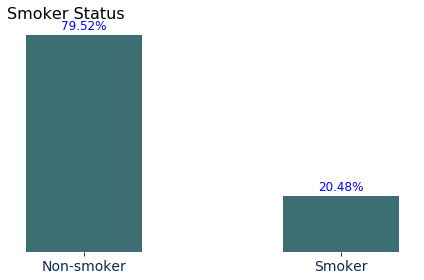

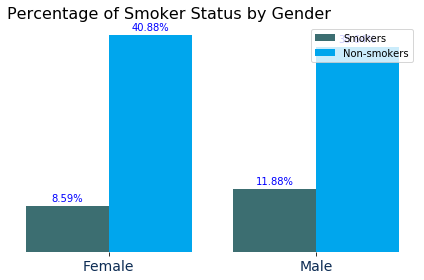

In [12]:
def percentage_smokers_func(insurance):
    sex_smoker = (insurance[insurance['smoker'] == 'yes'].groupby(['sex']).size()/(len(sex))) * 100
    sex_non_smoker = (insurance[insurance['smoker'] == 'no'].groupby(['sex']).size()/(len(sex))) * 100
    return sex_smoker, sex_non_smoker

percentage_smokers = percentage_smokers_func(insurance)
print(percentage_smokers)
chart_labels_gender = ['Female', 'Male']
plot_1x(labels_smoker_status, smoker_status, legend1 = 'Smokers', chart_title = 'Smoker Status')
plot_2x(chart_labels_gender, percentage_smokers, legend1 = 'Smokers', legend2 = 'Non-smokers', chart_title = 'Percentage of Smoker Status by Gender')

In the `Smoker Status` graph you can see that 79.52% of the sample population are non-smokers and 20.48% smoke. 
If you split this per gender, we can see that 40.88% of females and 38.63% of males were not smokers. 

## Age Distribution

              age
sex              
female  39.503021
male    38.917160


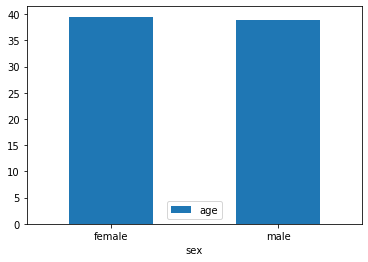

In [13]:
age_distribution = (insurance.groupby(['sex', 'age'])['age'].count()/(len(sex))) * 100
age_average = insurance[['sex', 'age']].groupby('sex').mean()
print(age_average)
age_average.plot.bar(rot=0)

## Location of Population

region
northeast    24.215247
northwest    24.289985
southeast    27.204783
southwest    24.289985
dtype: float64


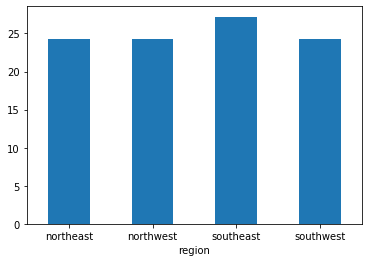

In [14]:
region_age_distribution_count = insurance[['age', 'region']].groupby('region').size()/(len(sex)) * 100
print(region_age_distribution_count)
region_age_distribution_count.plot.bar(rot=0)

(region
northeast    40
northwest    40
southeast    39
southwest    40
Name: age, dtype: int64, region
northeast    39
northwest    38
southeast    39
southwest    39
Name: age, dtype: int64)


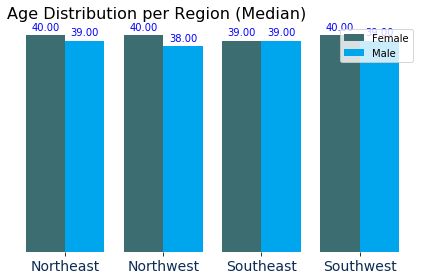

In [15]:
def age_dist_region_func(insurance):
    region_age_distribution_female = insurance[insurance['sex'] == 'female'].groupby('region')['age'].median()
    region_age_distribution_male = insurance[insurance['sex'] == 'male'].groupby('region')['age'].median()
    return region_age_distribution_female, region_age_distribution_male


age_gender_dist_region = age_dist_region_func(insurance)
print(age_gender_dist_region)
labels_age_gender_dist = ['Northeast', 'Northwest', 'Southeast', 'Southwest']   
plot_2x(labels_age_gender_dist, age_gender_dist_region, legend1 = 'Female', legend2 = 'Male', chart_title = 'Age Distribution per Region (Median)', symbol= 'x')    

Most of the population was equally sampled per region, except in the `Southeast` region, where there were 3% more participants

## Gender Distribution per Region

(region
northeast    12.032885
northwest    12.257100
southeast    13.079223
southwest    12.107623
Name: sex, dtype: float64, region
northeast    12.182362
northwest    12.032885
southeast    14.125561
southwest    12.182362
Name: sex, dtype: float64)


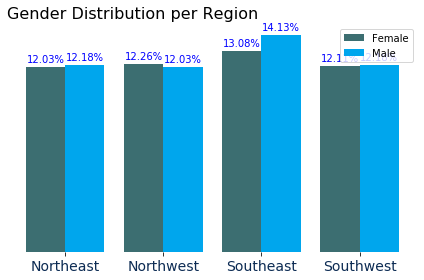

In [16]:
def gender_dist_region_func(insurance):
    region_distribution_female = insurance[insurance['sex'] == 'female'].groupby('region')['sex'].size()/(len(sex)) * 100
    region_distribution_male = insurance[insurance['sex'] == 'male'].groupby('region')['sex'].size()/(len(sex)) * 100
    return region_distribution_female, region_distribution_male


gender_dist_region = gender_dist_region_func(insurance)
print(gender_dist_region)
labels_gender_dist = ['Northeast', 'Northwest', 'Southeast', 'Southwest']   
plot_2x(labels_gender_dist, gender_dist_region, legend1 = 'Female', legend2 = 'Male', chart_title = 'Gender Distribution per Region')    


As shown above, the percentage of males in this study is: **50.52%** and the percentage of women in this study is: **49.48%**

In this case, I got curious to know what was the distribution of the sample in every region. The results in every region were very similar to the overall distribution; close to 50% gender distribution.

## Population with kids

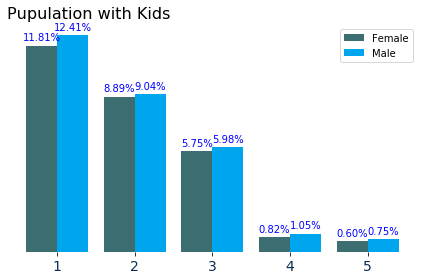

In [17]:
def population_with_kids_func(insurance):
    children_distribution_female = (insurance.loc[(insurance['children'] > 0) & (insurance['sex'] == 'female')]).groupby('children')['children'].size()/(len(sex)) * 100
    children_distribution_male = insurance.loc[(insurance['children'] > 0) & (insurance['sex'] == 'male')].groupby('children')['children'].size()/(len(sex)) * 100
    return children_distribution_female, children_distribution_male

population_with_kids = population_with_kids_func(insurance)
labels_population_with_kids = [1, 2, 3, 4, 5] 
plot_2x(labels_population_with_kids, population_with_kids, legend1 = 'Female', legend2 = 'Male', chart_title = 'Pupulation with Kids')
   

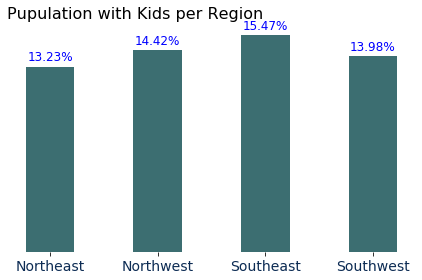

In [18]:
def regions_with_kids_func(insurance):
    children_distribution = (insurance.loc[(insurance['children'] > 0)]).groupby('region')['children'].size()/(len(sex)) * 100
    #children_distribution_male = insurance.loc[(insurance['children'] > 0)].groupby('region')['children'].size()/(len(sex)) * 100
    return children_distribution

regions_with_kids = regions_with_kids_func(insurance)
labels_regions_with_kids = ['Northeast', 'Northwest', 'Southeast', 'Southwest'] 
plot_1x(labels_regions_with_kids, regions_with_kids, legend1 = 'Region', chart_title = 'Pupulation with Kids per Region')

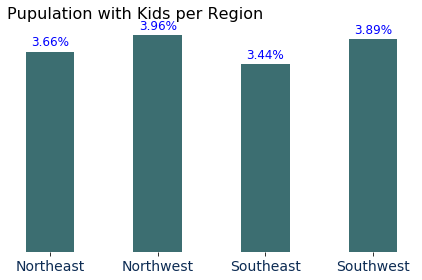

In [19]:
def regions_with_over2kids_func(insurance):
    children_distribution = (insurance.loc[(insurance['children'] > 2)]).groupby('region')['children'].size()/(len(sex)) * 100
    #children_distribution_male = insurance.loc[(insurance['children'] > 0)].groupby('region')['children'].size()/(len(sex)) * 100
    return children_distribution

regions_with_over2kids = regions_with_over2kids_func(insurance)
labels_regions_with_over2kids = ['Northeast', 'Northwest', 'Southeast', 'Southwest'] 
plot_1x(labels_regions_with_over2kids, regions_with_over2kids, legend1 = 'Region', chart_title = 'Pupulation with Kids per Region')

## Smokers Classification with Kids

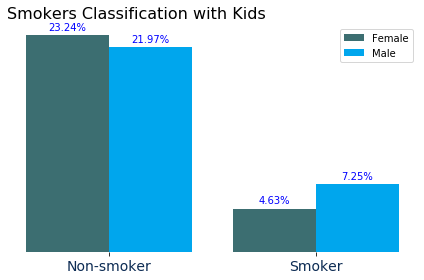

In [20]:
def smokers_with_kids_func(insurance):
    children_smoker_female = (insurance.loc[(insurance['children'] > 0) & (insurance['sex'] == 'female')]).groupby('smoker')['children'].size()/(len(sex)) * 100
    children_smoker_male = insurance.loc[(insurance['children'] > 0) & (insurance['sex'] == 'male')].groupby('smoker')['children'].size()/(len(sex)) * 100
    return children_smoker_female, children_smoker_male


smokers_with_kids = smokers_with_kids_func(insurance)
labels_smokers_with_kids = ['Non-smoker', 'Smoker'] 
plot_2x(labels_smokers_with_kids, smokers_with_kids, legend1 = 'Female', legend2 = 'Male', chart_title = 'Smokers Classification with Kids')
    

## Smokers Classification without Kids

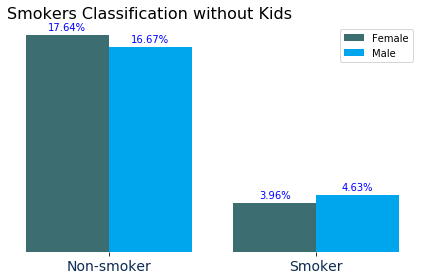

In [21]:
def smokers_without_kids_func(insurance):
    children_smoker_female = (insurance.loc[(insurance['children'] == 0) & (insurance['sex'] == 'female')]).groupby('smoker')['children'].size()/(len(sex)) * 100
    children_smoker_male = insurance.loc[(insurance['children'] == 0) & (insurance['sex'] == 'male')].groupby('smoker')['children'].size()/(len(sex)) * 100
    return children_smoker_female, children_smoker_male

smokers_without_kids = smokers_without_kids_func(insurance)
labels_smokers_without_kids = ['Non-smoker', 'Smoker']
plot_2x(labels_smokers_without_kids, smokers_without_kids, legend1 = 'Female', legend2 = 'Male', chart_title = 'Smokers Classification without Kids')
  

## BMI Clasification


| BMI         | Weight Status  |
| ----------- | -------------- |
| < 18.5      | Underweight    |
| 18.5 - 24.9 | Normal/Healthy |
| 25 - 29.9   | Overweight     |
| > 30        | Obese          |

In [22]:
def bmi_class_func(data):
    bmi_class = []

    for n in data['bmi']:
        if n < 18.5:
            bmi_class.append('underweight')
        elif 18.5 <= n < 25:
            bmi_class.append('healthy')
        elif 25 <= n < 30:
            bmi_class.append('overweight')
        if n >= 30:
            bmi_class.append('obese')
    return bmi_class

bmi_class = bmi_class_func(insurance)
insurance['bmi_class'] = bmi_class

print(insurance['bmi_class'])


0       overweight
1            obese
2            obese
3          healthy
4       overweight
           ...    
1333         obese
1334         obese
1335         obese
1336    overweight
1337    overweight
Name: bmi_class, Length: 1338, dtype: object


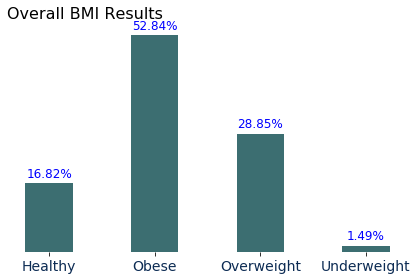

In [23]:
def bmi_results_func(insurance):
    overall_bmi= insurance.groupby('bmi_class')['bmi'].size()/(len(bmi)) * 100
    return overall_bmi

bmi_results = bmi_results_func(insurance)
labels_bmi_results = ['Healthy', 'Obese', 'Overweight', 'Underweight'] 
bmi_results_plot = plot_1x(labels_bmi_results, bmi_results, legend1 = 'Female', chart_title = 'Overall BMI Results')


The overall BMI results show that 52.84% of the population were `Obese` and another 28.85% were `Overweight`. These 2 factors have a big impact on the cost of the insurance.

## BMI per Gender

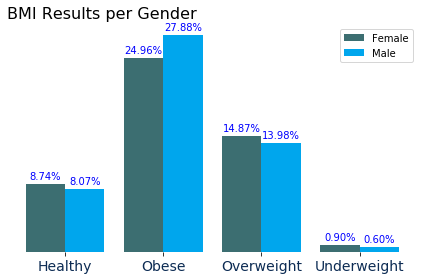

In [24]:
def bmi_per_gender_func(insurance):
    bmi_class_female = insurance[insurance['sex'] == 'female'].groupby(['bmi_class', 'sex'])['sex'].size()/(len(bmi)) * 100
    bmi_class_male = insurance[insurance['sex'] == 'male'].groupby(['bmi_class', 'sex'])['sex'].size()/(len(bmi)) * 100
    return bmi_class_female, bmi_class_male

bmi_per_gender = bmi_per_gender_func(insurance)
labels_bmi_per_gender = ['Healthy', 'Obese', 'Overweight', 'Underweight']
bmi_per_gender_plot = plot_2x(labels_bmi_per_gender, bmi_per_gender, legend1 = 'Female', legend2 = 'Male', chart_title = 'BMI Results per Gender')    

## BMI per Region

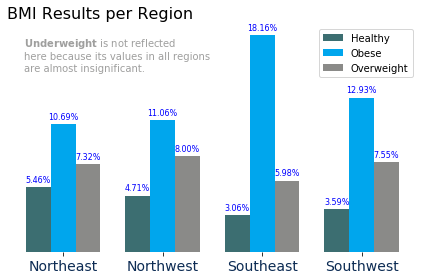

In [25]:
def bmi_per_region_func(insurance):
    region_bmi_healthy= insurance[insurance['bmi_class'] == 'healthy'].groupby('region').size()/(len(bmi)) * 100
    region_bmi_obese= insurance[insurance['bmi_class'] == 'obese'].groupby('region').size()/(len(bmi)) * 100
    region_bmi_overweight= insurance[insurance['bmi_class'] == 'overweight'].groupby('region').size()/(len(bmi)) * 100
    region_bmi_underweight= insurance[insurance['bmi_class'] == 'underweight'].groupby('region').size()/(len(bmi)) * 100
    return region_bmi_healthy, region_bmi_obese, region_bmi_overweight


bmi_per_region = bmi_per_region_func(insurance)
labels_bmi_per_region = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
bmi_per_region_plot = plot_3x(labels_bmi_per_region, bmi_per_region, legend1 = 'Healthy', legend2 = 'Obese', legend3 = 'Overweight', chart_title = 'BMI Results per Region', annotation= r"""$\bf{Underweight}$ is not reflected
here because its values in all regions
are almost insignificant.""") 


As previously shown, the majority of the population is considered `Obese` and `Overweight` base on the overall BMI results. However, in this graph we can observe that 18.16% of the Obese population are in the Shoutheast region. 

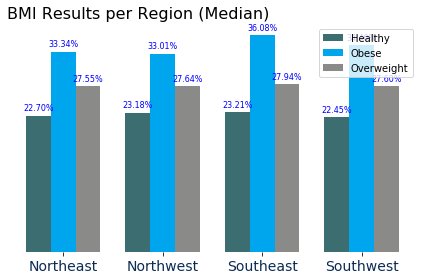

In [26]:
def bmi__median_per_region_func(insurance):
    region_bmi_healthy= insurance[insurance['bmi_class'] == 'healthy'].groupby('region')['bmi'].median()
    region_bmi_obese= insurance[insurance['bmi_class'] == 'obese'].groupby('region')['bmi'].median()
    region_bmi_overweight= insurance[insurance['bmi_class'] == 'overweight'].groupby('region')['bmi'].median()
    region_bmi_underweight= insurance[insurance['bmi_class'] == 'underweight'].groupby('region')['bmi'].median()
    return region_bmi_healthy, region_bmi_obese, region_bmi_overweight


bmi__median_per_region = bmi__median_per_region_func(insurance)
labels_bmi__median_per_region = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
bmi__median_per_region_plot = plot_3x(labels_bmi__median_per_region, bmi__median_per_region, legend1 = 'Healthy', legend2 = 'Obese', legend3 = 'Overweight', chart_title = 'BMI Results per Region (Median)') 

## Insurance Cost per Region

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


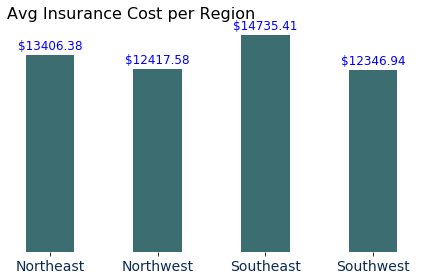

In [27]:
def insurance_cost_per_region_func(insurance):
    cost_per_region = insurance.groupby('region')['charges'].mean()
    return cost_per_region


insurance_cost_per_region = insurance_cost_per_region_func(insurance)
print(insurance_cost_per_region)
labels_insurance_cost_per_region = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
insurance_cost_per_region_plot = plot_1x(labels_insurance_cost_per_region, insurance_cost_per_region, legend1 = 'Charges',  chart_title = 'Avg Insurance Cost per Region', symbol = '$') 
#insurance_cost_per_region.plot.bar(y = 'Insurance Cost', rot=0)

The Southeast region shows a higher insurance cost than the rest of the regions. Let's find out why.

## Insurance Cost per Region based on BMI

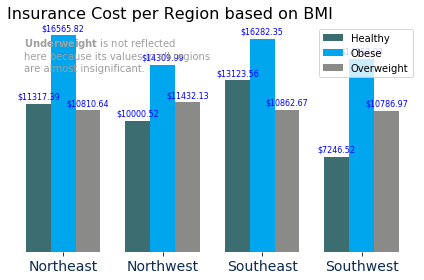

In [28]:
def cost_per_region_bmi_func(insurance):
    region_bmi_healthy= insurance[insurance['bmi_class'] == 'healthy'].groupby('region')['charges'].mean()
    region_bmi_obese= insurance[insurance['bmi_class'] == 'obese'].groupby('region')['charges'].mean()
    region_bmi_overweight= insurance[insurance['bmi_class'] == 'overweight'].groupby('region')['charges'].mean()
    region_bmi_underweight= insurance[insurance['bmi_class'] == 'underweight'].groupby('region')['charges'].mean()
    return region_bmi_healthy, region_bmi_obese, region_bmi_overweight, region_bmi_underweight


cost_per_region_bmi = cost_per_region_bmi_func(insurance)
#print(cost_per_region_bmi)
labels_cost_per_region_bmi = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
cost_per_region_bmi_plot = plot_3x(labels_cost_per_region_bmi, cost_per_region_bmi, legend1 = 'Healthy', legend2 = 'Obese', legend3 = 'Overweight', chart_title = 'Insurance Cost per Region based on BMI', annotation= r"""$\bf{Underweight}$ is not reflected
here because its values in all regions
are almost insignificant.""", symbol = '$')

## Insurance Cost per Region based on Smoking Status

(smoker  region   
yes     northeast    29673.536473
        northwest    30192.003182
        southeast    34844.996824
        southwest    32269.063494
Name: charges, dtype: float64, smoker  region   
no      northeast    9165.531672
        northwest    8556.463715
        southeast    8032.216309
        southwest    8019.284513
Name: charges, dtype: float64)


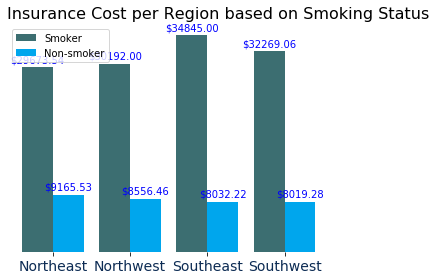

In [29]:
def cost_per_region_smoker_func(insurance):
    region_smoker = insurance[insurance['smoker'] == 'yes'].groupby(['smoker', 'region'])['charges'].mean()
    region_non_smoker = insurance[insurance['smoker'] == 'no'].groupby(['smoker', 'region'])['charges'].mean()
    return region_smoker, region_non_smoker


cost_per_region_smoker = cost_per_region_smoker_func(insurance)
print(cost_per_region_smoker)
labels_cost_per_region_smoker = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
cost_per_region_bmi_plot = plot_2x(labels_cost_per_region_smoker, cost_per_region_smoker, legend1 = 'Smoker', legend2 = 'Non-smoker', chart_title = 'Insurance Cost per Region based on Smoking Status', symbol = '$')

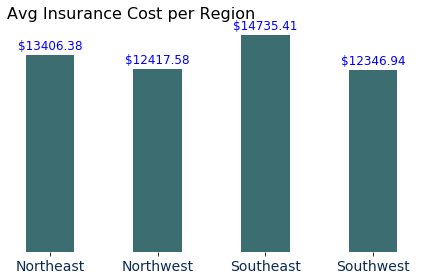

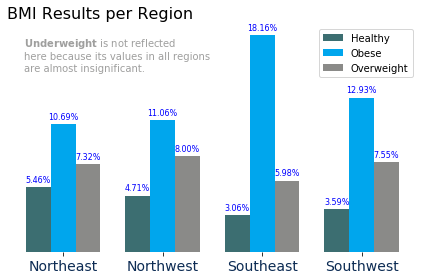

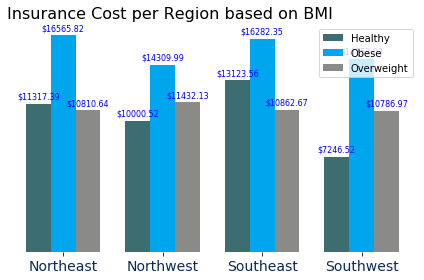

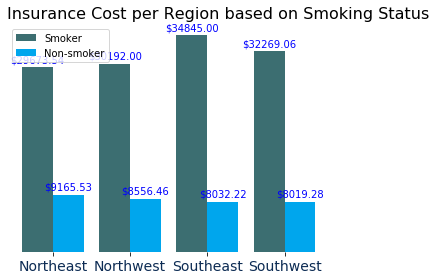

In [30]:
#Overall insurance cost per region 
plot_1x(labels_insurance_cost_per_region, insurance_cost_per_region, legend1 = 'Charges',  chart_title = 'Avg Insurance Cost per Region', symbol = '$') 

#BMI per Region
plot_3x(labels_bmi_per_region, bmi_per_region, legend1 = 'Healthy', legend2 = 'Obese', legend3 = 'Overweight', chart_title = 'BMI Results per Region', annotation= r"""$\bf{Underweight}$ is not reflected
here because its values in all regions
are almost insignificant.""") 
#Insurance Cost per Region based on BMI
plot_3x(labels_cost_per_region_bmi, cost_per_region_bmi, legend1 = 'Healthy', legend2 = 'Obese', legend3 = 'Overweight', chart_title = 'Insurance Cost per Region based on BMI', symbol = '$')

#Insurance Cost per Region based on Smoking Status
plot_2x(labels_cost_per_region_smoker, cost_per_region_smoker, legend1 = 'Smoker', legend2 = 'Non-smoker', chart_title = 'Insurance Cost per Region based on Smoking Status', symbol = '$')

## Conclusion

When we see that most of the data is equivalent per region, we can conclude that the main driver of the spike in insurance costs is the BMI. As shown in the graphs above, over 50% of the population was Obese and the region with the highest obese population was the Southeast region. 